<a href="https://colab.research.google.com/github/T0McKay/HIS406_Assignment2_DiabetesPrediction_TheoMcKay/blob/main/diabetes_predictor_Theo_McKay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AI + ML Assignment 2 - Diabetes Predictor

##Data Collection and Information Gathering

The Prima Indians Diabetes Dataset will be used for training and validation. This has 9 columns and 768 rows.


Link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [162]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

# Assign variable to represent dataset
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.


###Information Gathering

In [163]:
# displays first 5 rows
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [164]:
# displays information such as column labels, and null values.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [165]:
# displays statistic description for each row, including mean, variance and standard deviation.
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [166]:
# gets all  numeric features
numerical = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of Numerical Features :', len(numerical))

# gets all categorical features
categorical = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of Categorical Features :', len(categorical))

# displays number of discrete features
discrete = [feature for feature in numerical if len(df[feature].unique())<=25]
print('Number of Discrete Features :',len(discrete))

# displays number of continuous features
continuous = [feature for feature in numerical if feature not in discrete]
print('Number of Continuous Features :',len(continuous))

Number of Numerical Features : 9
Number of Categorical Features : 0
Number of Discrete Features : 2
Number of Continuous Features : 7


###Insight

All categories have numerical values.

Two of these are discrete (Pregnancies and Outcome), seven are continuous.

##Data Preprocessing

###Data Cleaning

####Missing Value Check

In [167]:
print(df.isnull().sum()) # shows there are no null values in dataset, so no fix needed

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


####NaN Check

In [168]:
df.isna().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


####Duplicate Records Check and Delete

In [169]:
# shows no duplicates that need to get deleted
df.duplicated().sum()
# deletes duplications
df = df.drop_duplicates()

### Feature Engineering
The following section will create new features to better support the models accuracy.

####Invalid Zero Values
Some columns can have zeros as a value where its not possible. This needs to be checked and changed.

Columns include: Glucose, BloodPressure, SkinThickness, Insulin and BMI

In [170]:
# list of columns that could have invalid zero values
check_for_invalid = [
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI'
]

# checks for invalid zeros
(df[check_for_invalid] == 0).sum()

,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


#####Median Imputation
Invalid zeros in the Insulin column will be replaced with the median (middle value) as the mean may be scewed by extreme values of insulin levels in diabetics.

In [171]:
#gets median for Insulin and replaces zeros
median_insulin = df['Insulin'].median()
df['Insulin'] = df['Insulin'].replace(0, median_insulin)

#####Mean Imputation
This will be used to replace the invalid zeros in columns Glucose, BloodPressure, SkinThickness and BMI.

This is because they are all continuous and normally distributed.

In [172]:
# remaining list of columns
remaining_checks = [
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'BMI'
]

for column in remaining_checks:
    median = df[column].median()
    df[column] = df[column].replace(0, median)

####Check No Invalid Zeros

In [173]:
(df[check_for_invalid] == 0).sum()

,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0


##Data Visualisation

###Outcome Distribution

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

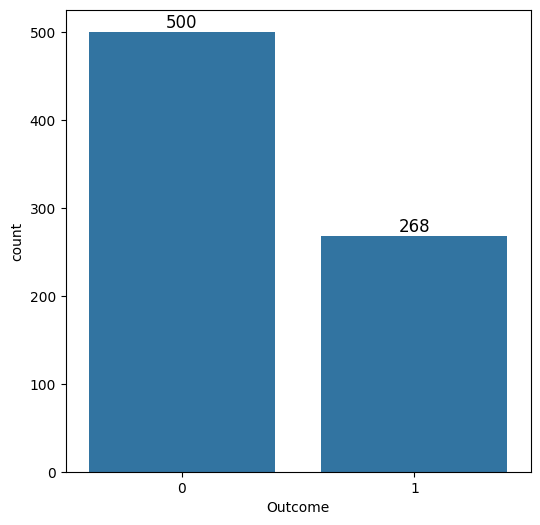

In [175]:
fig, ax = plt.subplots(1,1, figsize=(6, 6))
sns.countplot(x='Outcome', data=df, ax=ax)
#gives bar exact number at top
for container in ax.containers:
  ax.bar_label(container, color='black',size=12)
plt.title('')
plt.show()

####Insight:

This shows that the dataset is imbalanced as there are more people who are non-diabetic (500) than diabetic (268).

###Correlation Heatmap

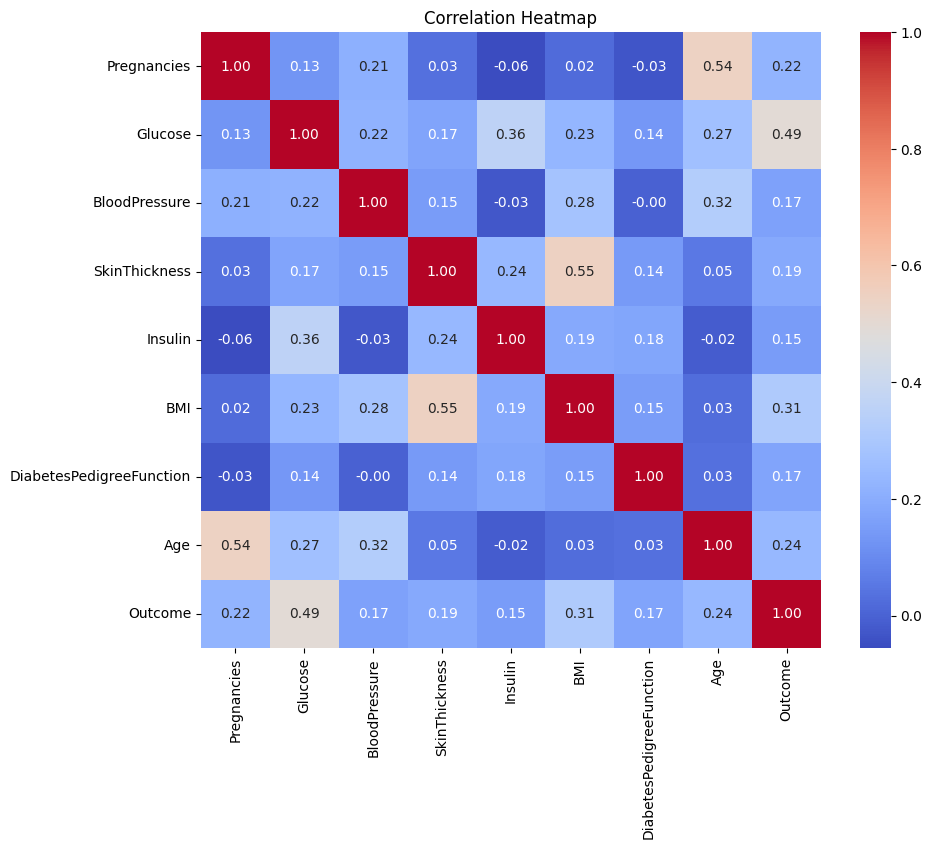

In [176]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

####Insight:

This correlation heamap highlights some relationships that need to be considered in prediction:

*   Age and Pregnancies
*   BMI and Skin thickness

When looking at the diabetes-diagnosis outcome, it appears Glucose, BMI, age and Pregancies are most relevant (as they are all > 0.2 correlation).

Despite this, I will not remove the other features as they move be useful even if they have low correlation (< 0.2).

##Train/Test Split
The dataset will be split 80/20.

80% will be used to train the model. 20% will be used to test the model.

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [179]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

##ML Types

###Libraries

In [203]:
# Inspection tools
import plotly.express as px
# Logistic regression
from sklearn.linear_model import LogisticRegression
# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
# K-NN
from sklearn.neighbors import KNeighborsClassifier
# Accuracy Checks
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

### Logistic Regression

In [181]:
# Training logistic model
clf_logistic = LogisticRegression(max_iter=1000, random_state=0)
clf_logistic.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [182]:
logistic_pred = clf_logistic.predict(x_test)
# Calculates logistic model accuracy percentage
logistic_model_accuracy = accuracy_score(y_test, logistic_pred) * 100
# Calculates logistic model precision score
logistic_model_precision = precision_score(y_test, logistic_pred) * 100
# Calculates logistic model recall
logistic_model_recall = recall_score(y_test, logistic_pred) * 100
# Calculates logistic model f1-score
logistic_model_f1 = f1_score(y_test, logistic_pred) * 100

####Visualise Logistic Regression Learning

#####Feature Importance

This shows how the Logistic Regression model has determined the weight of each feature. By visualising this, the prediction of the model is easier to explain.

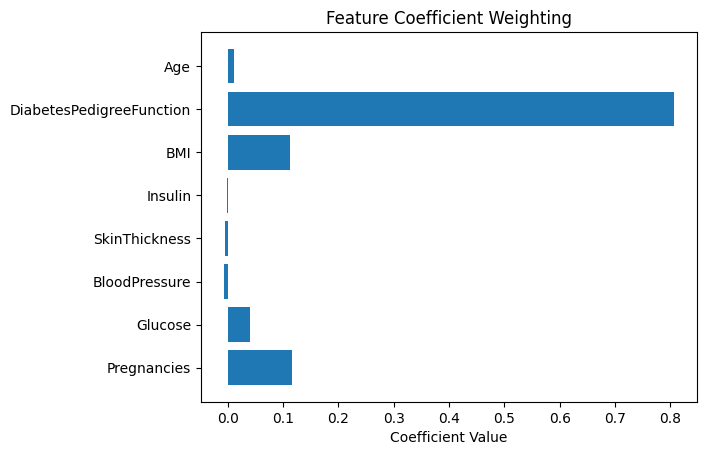

In [183]:
coef = clf_logistic.coef_[0]
features = x_train.columns

plt.barh(features, coef)
plt.xlabel("Coefficient Value")
plt.title("Feature Coefficient Weighting")
plt.show()


The following diagram shows if these coefficients are positive or negative using the imported plotly library.

In [204]:
colors = ['Positive' if c > 0 else 'Negative' for c in coef]
fig = px.bar(
    x=x_train.columns, y=coef, color=colors,
    labels=dict(x='Feature', y='Coefficient'),
    title='Logistic Regression Feature Weighting'
)
fig.show()

This shows that the model has weighted Diabetes Pedigree as a high indicator of diabetes. It also shows that Pregnancies, Glucose, BMI and Age have positive coefficient weightings.

The model has shown that blood pressure, skin thickness and insulin are fairly insignificant with coefficients very close to 0. Noticeably, these are also negative coefficients.

###Decision Trees

####Using Gini Index

In [185]:
# Training using gini index
clf_decision_tree_gini = DecisionTreeClassifier(criterion="gini", random_state=0)
clf_decision_tree_gini.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [186]:
decision_tree_gini_pred = clf_decision_tree_gini.predict(x_test)
# Calculates decision tree gini model accuracy percentage
decision_tree_gini_accuracy = accuracy_score(y_test, decision_tree_gini_pred) * 100
# Calculates decision tree gini model precision score
decision_tree_gini_precision = precision_score(y_test, decision_tree_gini_pred) * 100
# Calculates decision tree gini model recall
decision_tree_gini_recall = recall_score(y_test, decision_tree_gini_pred) * 100
# Calculates decision tree gini model f1-score
decision_tree_gini_f1 = f1_score(y_test, decision_tree_gini_pred) * 100

####Using Entropy Index

In [187]:
# Training using entropy index
clf_decision_tree_entropy = DecisionTreeClassifier(criterion="entropy", random_state=0)
clf_decision_tree_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [188]:
decision_tree_entropy_pred = clf_decision_tree_entropy.predict(x_test)
# Calculates decision tree entropy model accuracy percentage
decision_tree_entropy_accuracy = accuracy_score(y_test, decision_tree_entropy_pred) * 100
# Calculates decision tree entropy model precision score
decision_tree_entropy_precision = precision_score(y_test, decision_tree_entropy_pred) * 100
# Calculates decision tree entropy model recall
decision_tree_entropy_recall = recall_score(y_test, decision_tree_entropy_pred) * 100
# Calculates decision tree entropy model f1-score
decision_tree_entropy_f1 = f1_score(y_test, decision_tree_entropy_pred) * 100

####Visualise Decision Trees

#####Decision Tree Gini Index

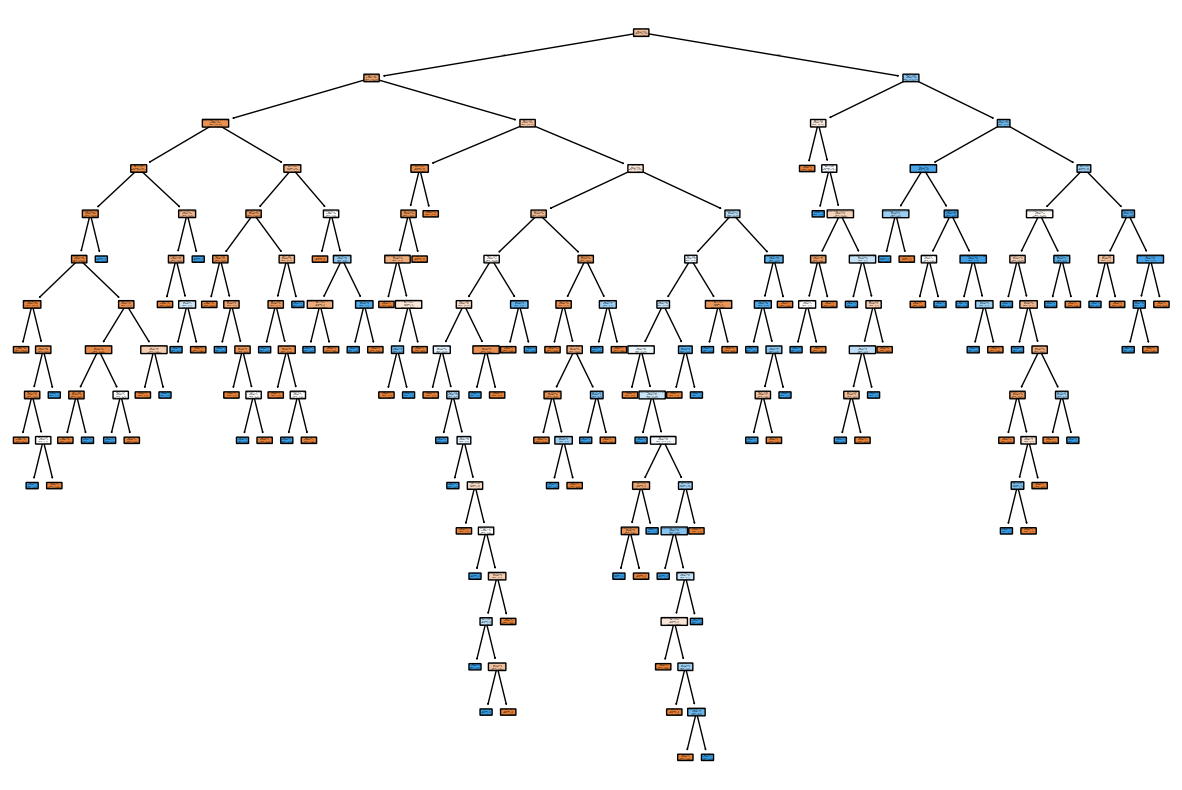

In [189]:
plt.figure(figsize=(15,10))
plot_tree(clf_decision_tree_gini, filled=True, feature_names=df.columns[:-1], class_names=['Non-Diabetic', 'Diabetic'], rounded=True)
plt.show()

#####Decision Tree Entropy Index

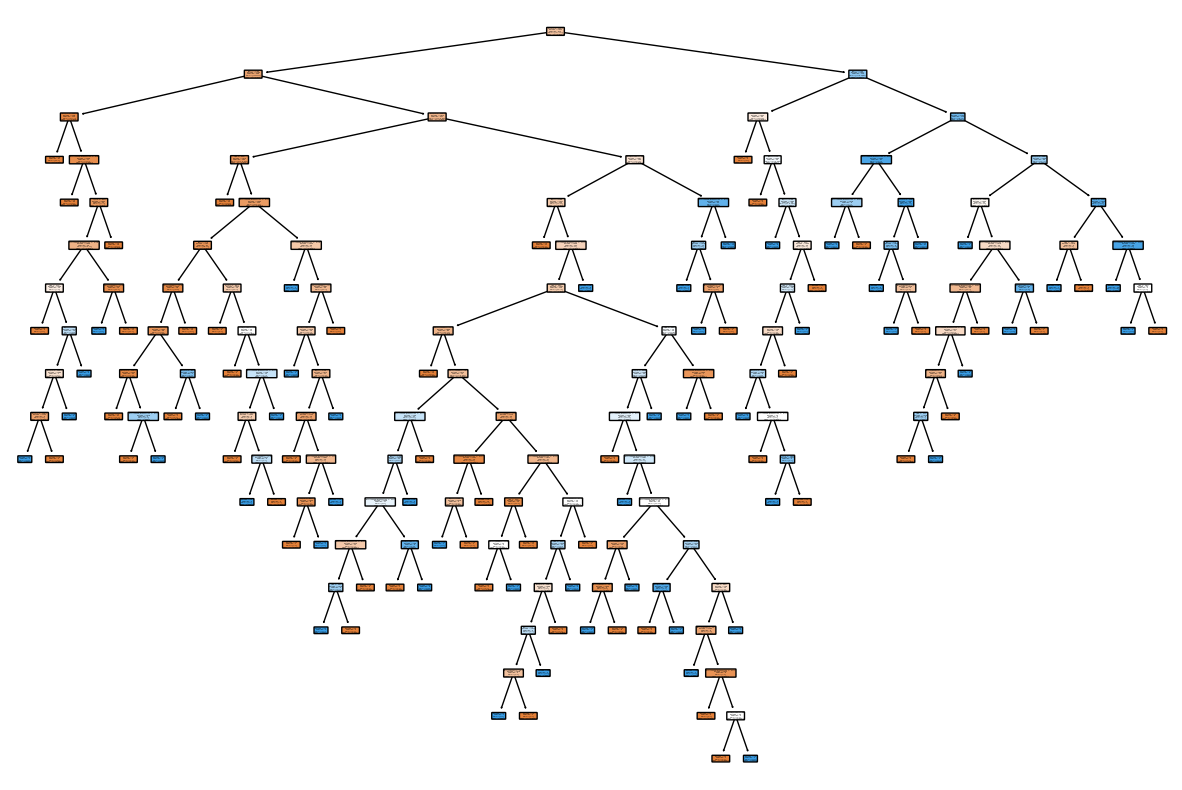

In [190]:
plt.figure(figsize=(15,10))
plot_tree(clf_decision_tree_entropy, filled=True, feature_names=df.columns[:-1], class_names=['Non-Diabetic', 'Diabetic'], rounded=True)
plt.show()

### K-Nearest Neighbours

In [191]:
# Training KNN model
neighbours_considered = 5
clf_knn = KNeighborsClassifier(n_neighbors=neighbours_considered)
clf_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [192]:
knn_pred = clf_knn.predict(x_test)
# Calculates KNN accuracy percentage
knn_accuracy = accuracy_score(y_test, knn_pred) * 100
# Calculates KNN precision score
knn_precision = precision_score(y_test, knn_pred) * 100
# Calculates KNN recall
knn_recall = recall_score(y_test, knn_pred) * 100
# Calculates KNN f1-score
knn_f1 = f1_score(y_test, knn_pred) * 100

##Evaluation

### Accuracy
This tells me how often I an expect the model to correctly predict the outcome.

In [193]:
print(f"Logistic Regression Accuracy         : {logistic_model_accuracy:.2f}%")
print(f"Decision Tree Gini Index Accuracy    : {decision_tree_gini_accuracy:.2f}%")
print(f"Decision Tree Entropy Index Accuracy : {decision_tree_entropy_accuracy:.2f}%")
print(f"K-Nearest Neighbours Accuracy        : {knn_accuracy:.2f}%")

Logistic Regression Accuracy         : 72.08%
Decision Tree Gini Index Accuracy    : 64.29%
Decision Tree Entropy Index Accuracy : 61.69%
K-Nearest Neighbours Accuracy        : 68.18%


###Precision
This tells me the proportion of predicted as diabetic labels that are actually correct and diabetic. This means the score will emphasise the model's tendency to predict false positives.

In [194]:
print(f"Logistic Regression Precision         : {logistic_model_precision:.2f}%")
print(f"Decision Tree Gini Index Precision    : {decision_tree_gini_precision:.2f}%")
print(f"Decision Tree Entropy Index Precision : {decision_tree_entropy_precision:.2f}%")
print(f"K-Nearest Neighbours Precision        : {knn_precision:.2f}%")

Logistic Regression Precision         : 75.00%
Decision Tree Gini Index Precision    : 56.25%
Decision Tree Entropy Index Precision : 52.27%
K-Nearest Neighbours Precision        : 63.64%


###Recall
This tells me the proportion of predicted as non-diabetic labels that are actually correct and diabetic. This means the score will emphasise the model's tendency to predict false negatives.

Recall is also known as sensitivity.

In [195]:
print(f"Logistic Regression Recall         : {logistic_model_recall:.2f}%")
print(f"Decision Tree Gini Index Recall    : {decision_tree_gini_recall:.2f}%")
print(f"Decision Tree Entropy Index Recall : {decision_tree_entropy_recall:.2f}%")
print(f"K-Nearest Neighbours Recall        : {knn_recall:.2f}%")

Logistic Regression Recall         : 44.26%
Decision Tree Gini Index Recall    : 44.26%
Decision Tree Entropy Index Recall : 37.70%
K-Nearest Neighbours Recall        : 45.90%


###F1-Score
This tells me the "harmonic mean" of precision and recall, therefore considering both false positives and false negatives.

This is particularly important for this dataset as the outcomes are already imbalanced.

In [196]:
print(f"Logistic Regression F1-Score         : {logistic_model_f1:.2f}%")
print(f"Decision Tree Gini Index F1-Score    : {decision_tree_gini_f1:.2f}%")
print(f"Decision Tree Entropy Index F1-Score : {decision_tree_entropy_f1:.2f}%")
print(f"K-Nearest Neighbours F1-Score        : {knn_f1:.2f}%")

Logistic Regression F1-Score         : 55.67%
Decision Tree Gini Index F1-Score    : 49.54%
Decision Tree Entropy Index F1-Score : 43.81%
K-Nearest Neighbours F1-Score        : 53.33%


###Confusion Matrices

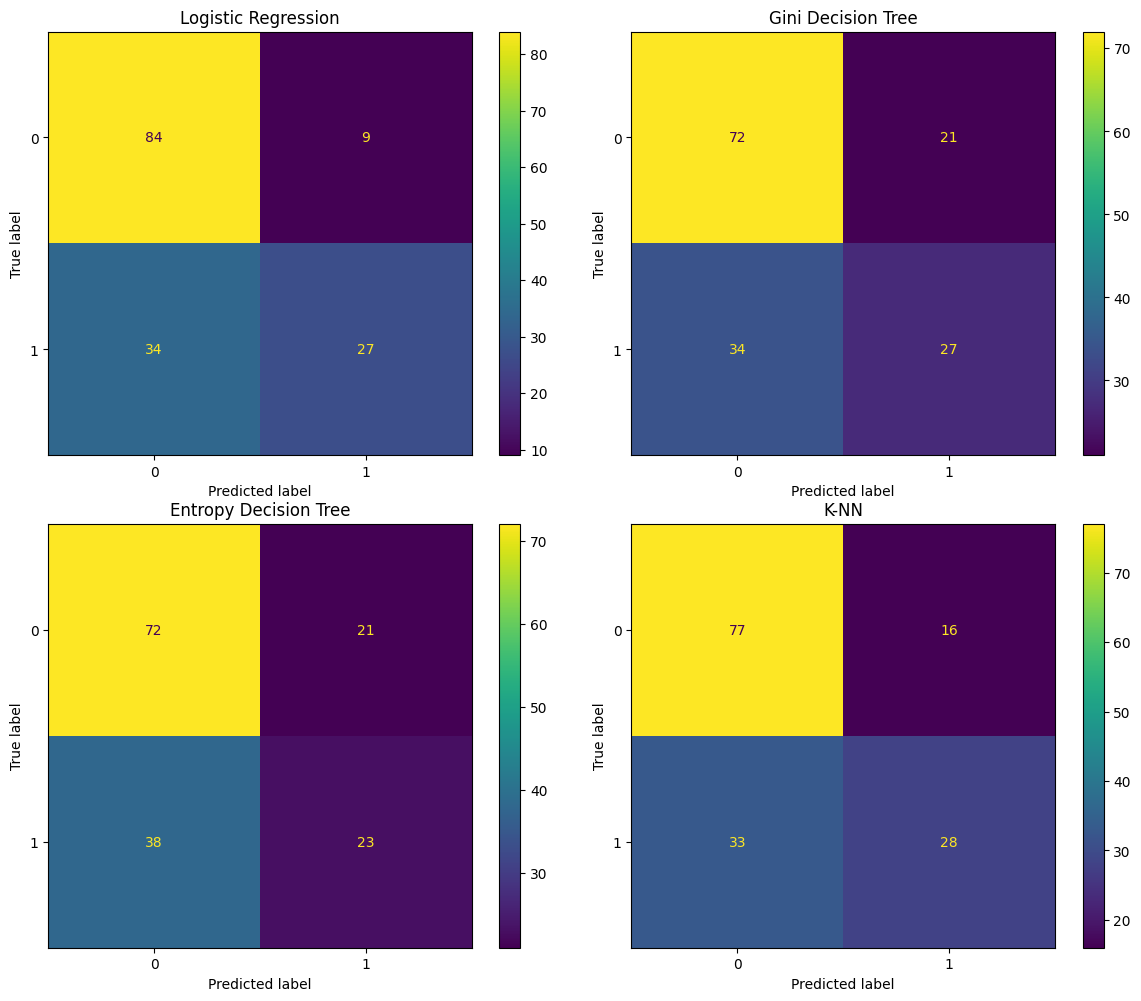

In [197]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))
model_preds = [logistic_pred, decision_tree_gini_pred, decision_tree_entropy_pred, knn_pred]
titles = ["Logistic Regression", "Gini Decision Tree", "Entropy Decision Tree", "K-NN"]

for ax, pred, title in zip(axes.ravel(), model_preds, titles) :
  matrix = confusion_matrix(y_test, pred)
  disp = ConfusionMatrixDisplay(matrix)
  disp.plot(ax=ax)
  ax.set_title(title)

plt.tight_layout()
plt.show()

###Insight:

From these confusion matrices, it is shown that Logistic Regression performs best as it has the highest amount of TPs and the lowest amount of FPs.

This also shows that the two decision tree models are unsuitable as they have the highest amount of FPs and lowest amount of TPs.



##Model Conclusion
Considering the accuracy, f1-score and confusion matrices of each of these models:

*   Logistic Regression consistenly displayed best results
*   Decision Trees both performed poorly
*   The decision tree using Gini index performed the worst

Therefore, Logistic Regression will be used as the prototype-proof of concept for predicting diabetes risk.

